In [267]:
import opendatasets as od

In [268]:
! pip install opendatasets --upgrade --quiet

/Users/admin/.zshenv:2: permission denied: /Users/admin/Documents/java

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [269]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jovian
import numpy as np
import matplotlib
import os

In [270]:
#%matplotlib

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#sns.set_style('darkgrid')
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [271]:
df=pd.read_csv('weatherAUS.csv')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# ExploratoryData Analysis

#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


# Missing value

In [272]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

MinTemp 0.0102  % missing values
MaxTemp 0.0087  % missing values
Rainfall 0.0224  % missing values
Evaporation 0.4317  % missing values
Sunshine 0.4801  % missing values
WindGustDir 0.071  % missing values
WindGustSpeed 0.0706  % missing values
WindDir9am 0.0726  % missing values
WindDir3pm 0.0291  % missing values
WindSpeed9am 0.0121  % missing values
WindSpeed3pm 0.0211  % missing values
Humidity9am 0.0182  % missing values
Humidity3pm 0.031  % missing values
Pressure9am 0.1036  % missing values
Pressure3pm 0.1033  % missing values
Cloud9am 0.3842  % missing values
Cloud3pm 0.4081  % missing values
Temp9am 0.0121  % missing values
Temp3pm 0.0248  % missing values
RainToday 0.0224  % missing values
RainTomorrow 0.0225  % missing values


In [273]:
df['RainTomorrow_numeric'] = df['RainTomorrow'].map({'Yes': int(1), 'No': int(0)})



# this is a Chronological data
Chronological data refers to data that is organized in the order of time — from earliest to latest (or vice versa).

In [274]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_numeric
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  145460 non-null  object 
 1   Location              145460 non-null  object 
 2   MinTemp               143975 non-null  float64
 3   MaxTemp               144199 non-null  float64
 4   Rainfall              142199 non-null  float64
 5   Evaporation           82670 non-null   float64
 6   Sunshine              75625 non-null   float64
 7   WindGustDir           135134 non-null  object 
 8   WindGustSpeed         135197 non-null  float64
 9   WindDir9am            134894 non-null  object 
 10  WindDir3pm            141232 non-null  object 
 11  WindSpeed9am          143693 non-null  float64
 12  WindSpeed3pm          142398 non-null  float64
 13  Humidity9am           142806 non-null  float64
 14  Humidity3pm           140953 non-null  float64
 15  

In [276]:
df.dropna(subset=['RainTomorrow_numeric','RainTomorrow'], inplace=True)

# Training,Validation and Testsets

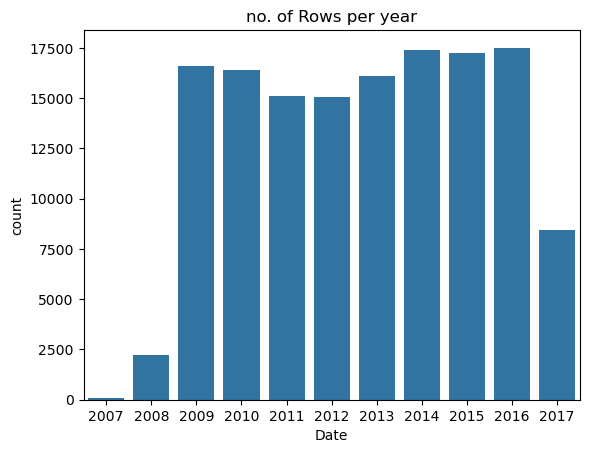

In [277]:
plt.title('no. of Rows per year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [278]:
df.shape

(142193, 24)

# split the data in to train test and val

In [279]:
year=pd.to_datetime(df.Date).dt.year
train_df=df[year < 2015]
val_df=df[year == 2015]
test_df=df[year > 2015]

In [280]:
print('train_df : ',train_df.shape)
print('val_df : ',val_df.shape)
print('test_df : ',test_df.shape)

train_df :  (98988, 24)
val_df :  (17231, 24)
test_df :  (25974, 24)


# input and Target Columns

Let's identify the and target columns.

In [281]:
input_cols=list(train_df.columns)[1:-1]
target_cols='RainTomorrow'

In [282]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_cols].copy()

In [283]:
val_inputs=val_df[input_cols].copy()
val_target = val_df[target_cols].copy()

In [284]:
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_cols].copy()

In [285]:
test_target.shape

(25974,)

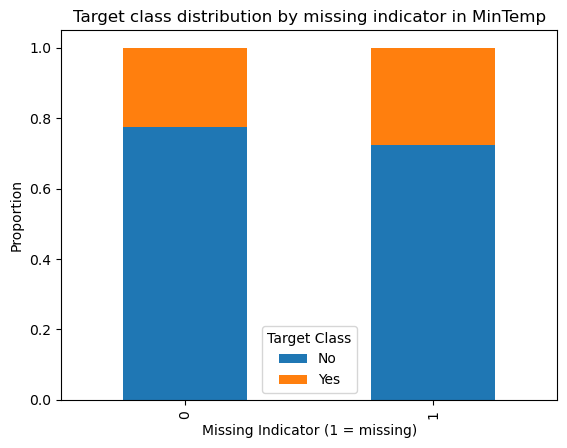

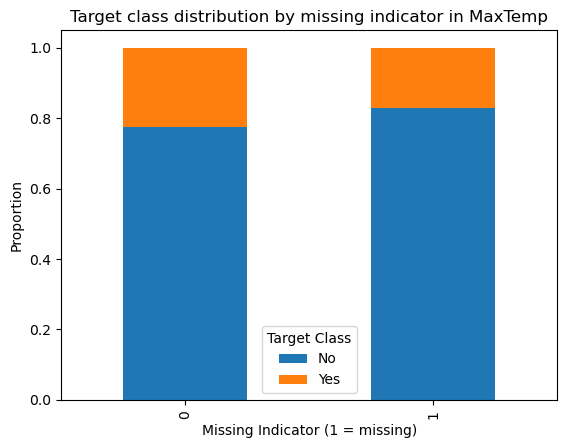

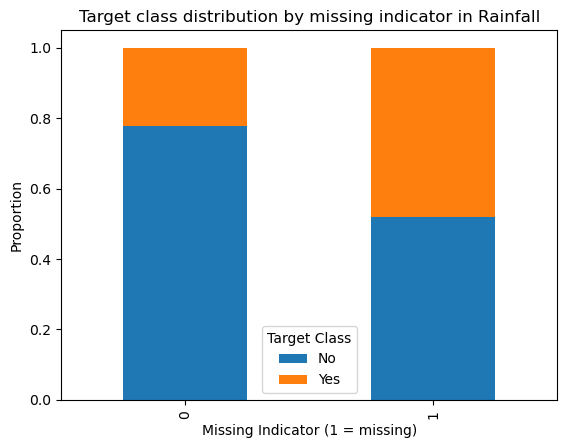

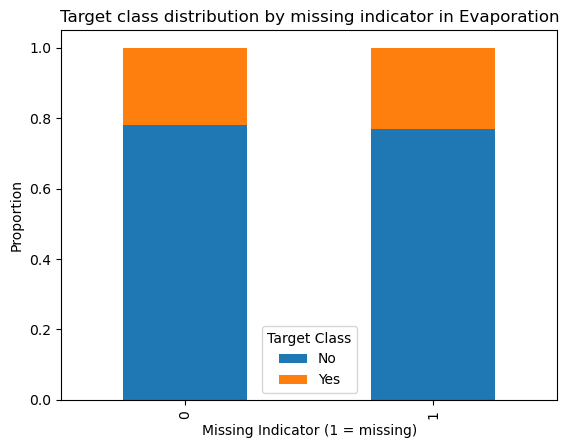

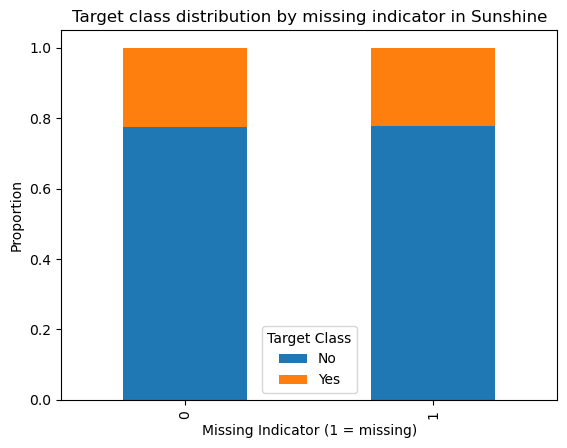

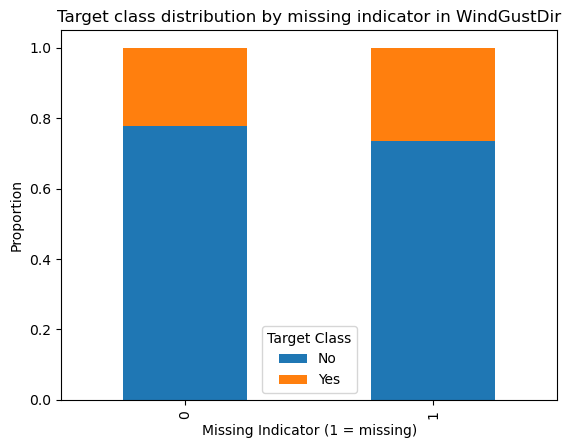

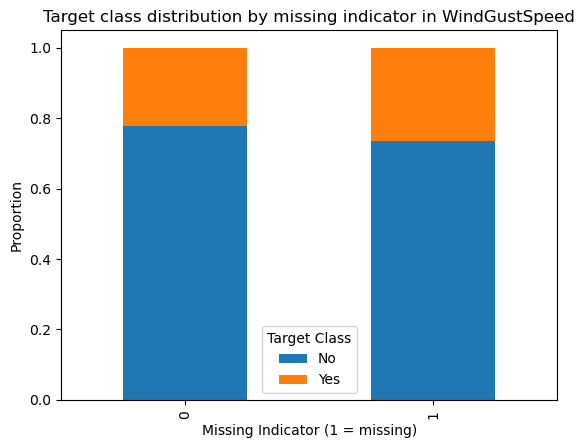

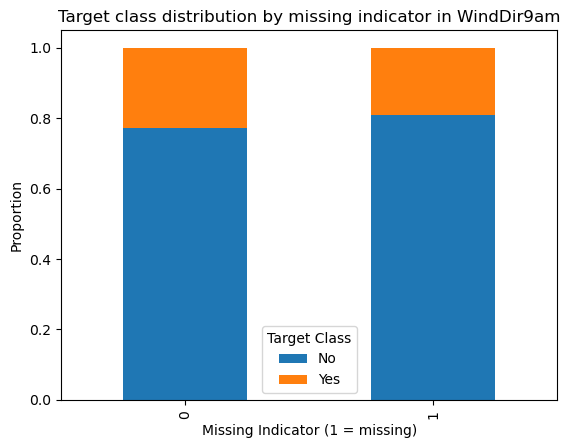

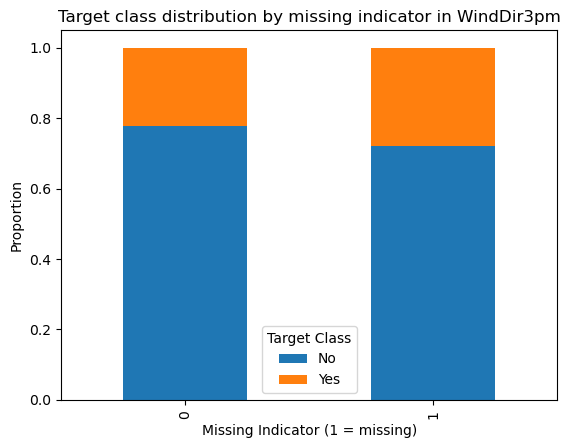

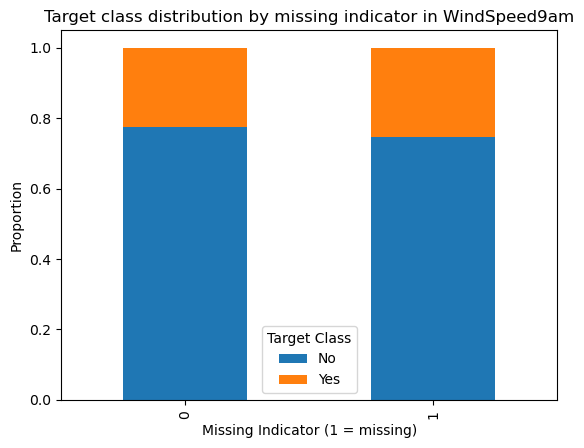

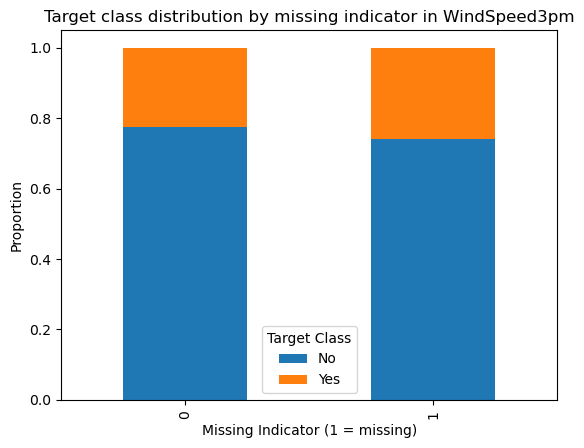

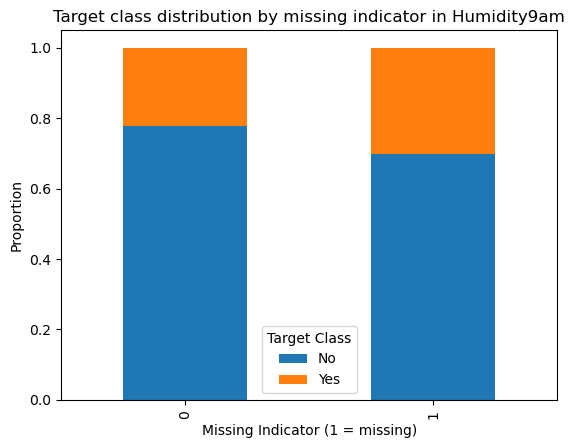

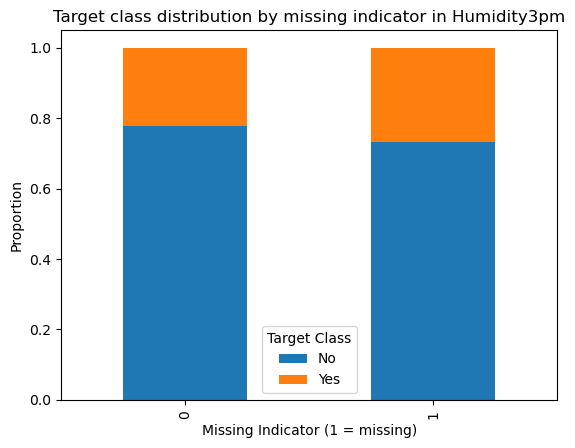

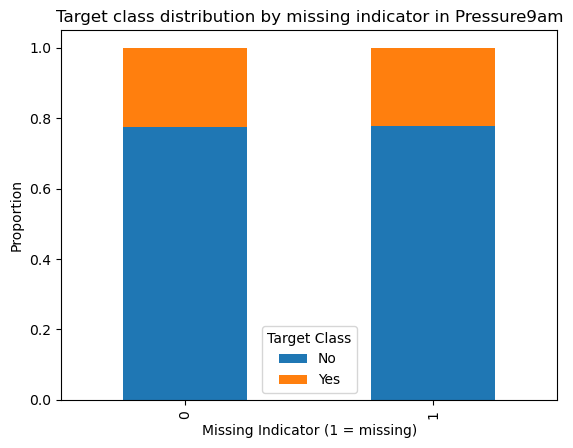

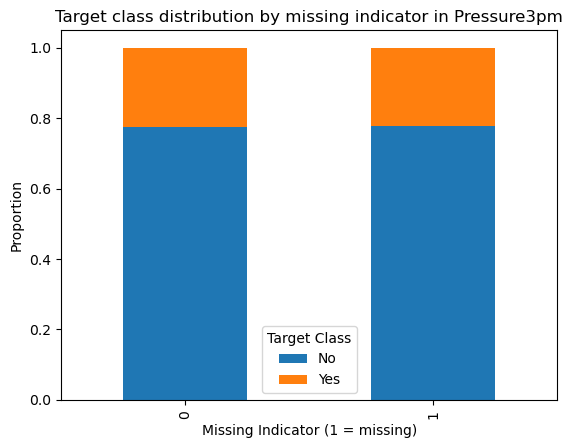

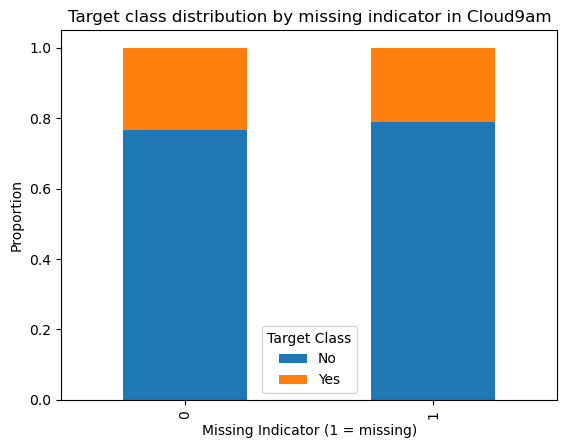

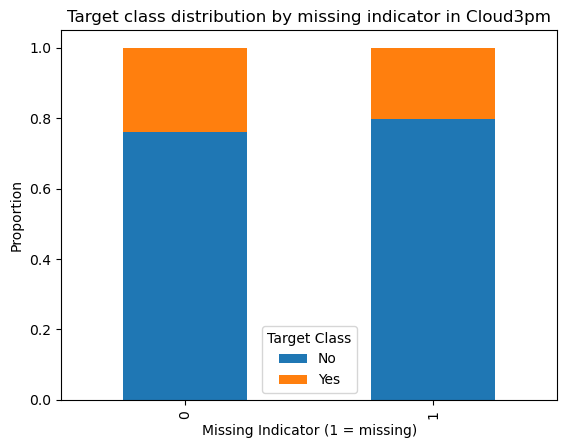

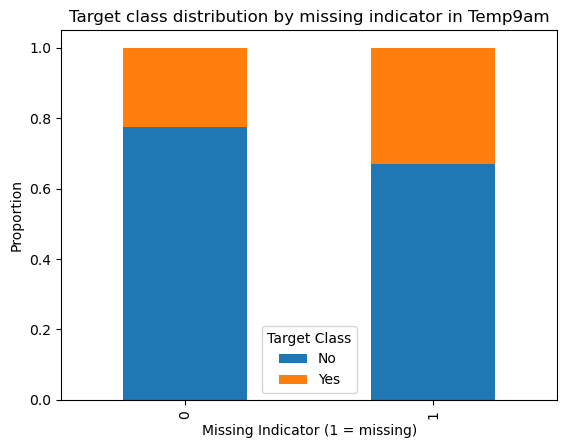

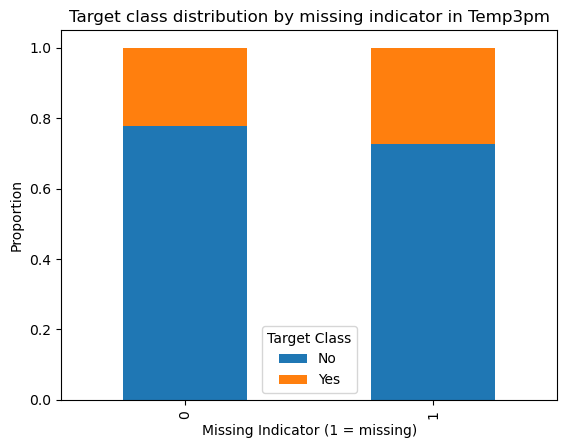

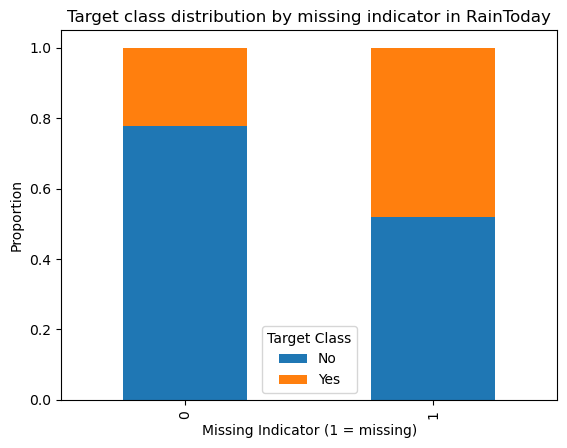

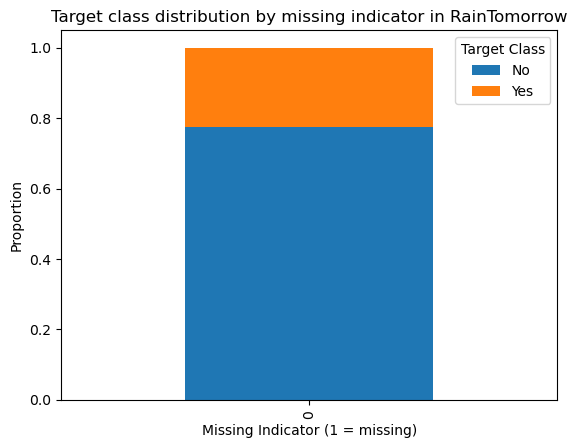

In [286]:
for feature in features_with_na:
    data = df.copy()

    # Create an indicator for missing values
    data[feature + '_NA'] = np.where(data[feature].isnull(), 1, 0)

    # Plot the proportion of positive class for missing vs non-missing
    classification_ratio = data.groupby(feature + '_NA')['RainTomorrow'].value_counts(normalize=True).unstack()
    classification_ratio.plot(kind='bar', stacked=True)

    plt.title(f"Target class distribution by missing indicator in {feature}")
    plt.xlabel('Missing Indicator (1 = missing)')
    plt.ylabel('Proportion')
    plt.legend(title='Target Class')
    plt.show()


In [287]:
test_inputs=test_df[input_cols].copy()
test_target = test_df[target_cols].copy()
test_target

2498       No
2499      Yes
2500      Yes
2501      Yes
2502       No
         ... 
145454     No
145455     No
145456     No
145457     No
145458     No
Name: RainTomorrow, Length: 25974, dtype: object

Lets also identify number and categorical columns

In [288]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
print('numeric_cols : ',numeric_cols)
print('categorical_cols : ',categorical_cols)

numeric_cols :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical_cols :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [289]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,NaN,NaN,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8
144549,15.1,36.8,0.0,NaN,NaN,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8
144550,17.3,37.8,0.0,NaN,NaN,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7
144551,20.1,38.5,0.0,NaN,NaN,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2


# imputing miissing numeric values

In [290]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [291]:
from sklearn.impute import SimpleImputer

In [292]:
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [293]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [294]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

In [295]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [296]:
val_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000,17231.000000
mean,0.488364,0.528826,0.005761,0.069254,0.537175,0.260422,0.158938,0.212012,0.681702,0.505003,0.635487,0.618666,0.496524,0.500679,0.499028,0.527158
std,0.154157,0.142967,0.022218,0.040289,0.178659,0.097937,0.099504,0.099354,0.197546,0.207120,0.111121,0.110887,0.255261,0.236935,0.147665,0.139984
min,0.007075,0.017241,0.000000,0.000000,0.000000,0.007752,0.000000,0.000000,0.040000,0.000000,0.125620,0.052805,0.000000,0.000000,-0.006508,0.021484
25%,0.376179,0.421456,0.000000,0.063107,0.533207,0.193798,0.080460,0.149425,0.560000,0.360000,0.568595,0.551155,0.333333,0.444444,0.392625,0.425781
50%,0.487887,0.519157,0.000000,0.066381,0.533207,0.255814,0.149425,0.214225,0.690000,0.514826,0.614876,0.599010,0.493021,0.500352,0.494577,0.521484
75%,0.601415,0.632184,0.001617,0.066381,0.573427,0.310078,0.218391,0.275862,0.830000,0.640000,0.705785,0.689769,0.666667,0.666667,0.605206,0.623047
max,0.952830,0.948276,0.666307,0.854369,1.013986,1.000000,1.000000,0.850575,1.000000,1.000000,0.971901,0.962046,0.888889,0.888889,0.941432,0.935547


# Encoding Categoricall Data

In [297]:
from sklearn.preprocessing import OneHotEncoder

In [298]:
train_df[categorical_cols].isna().sum()

Location           0
WindGustDir     6943
WindDir9am      7323
WindDir3pm      2030
RainToday       1000
RainTomorrow       0
dtype: int64

In [299]:
train_df.loc[:, categorical_cols] = train_df[categorical_cols].fillna('missing')
val_df.loc[:, categorical_cols] = val_df[categorical_cols].fillna('missing')
test_df.loc[:, categorical_cols] = test_df[categorical_cols].fillna('missing')


In [300]:
train_df[categorical_cols].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [301]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])

In [302]:
encoder_cols=list(encoder.get_feature_names_out(categorical_cols))  

In [303]:
import pandas as pd

# Transform categorical columns and get a new DataFrame with encoded columns
encoded_train = pd.DataFrame(
    encoder.transform(train_inputs[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train_inputs.index
)

# Drop old categorical columns and concatenate the encoded ones
train_inputs = pd.concat([train_inputs.drop(columns=categorical_cols), encoded_train], axis=1)

# Repeat for val and test:
encoded_val = pd.DataFrame(
    encoder.transform(val_inputs[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=val_inputs.index
)
val_inputs = pd.concat([val_inputs.drop(columns=categorical_cols), encoded_val], axis=1)

encoded_test = pd.DataFrame(
    encoder.transform(test_inputs[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=test_inputs.index
)
test_inputs = pd.concat([test_inputs.drop(columns=categorical_cols), encoded_test], axis=1)


In [304]:
train_inputs

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan,RainTomorrow_No,RainTomorrow_Yes
0,0.516509,0.517241,0.001617,0.066381,0.533207,0.294574,0.229885,0.275862,0.71,0.22,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.375000,0.559387,0.000000,0.066381,0.533207,0.294574,0.045977,0.252874,0.44,0.25,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.504717,0.570881,0.000000,0.066381,0.533207,0.310078,0.218391,0.298851,0.38,0.30,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.417453,0.614943,0.000000,0.066381,0.533207,0.139535,0.126437,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.613208,0.697318,0.002695,0.066381,0.533207,0.271318,0.080460,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.714559,0.000000,0.066381,0.533207,0.286822,0.275862,0.298851,0.22,0.13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
144549,0.556604,0.783525,0.000000,0.066381,0.533207,0.193798,0.218391,0.229885,0.16,0.08,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
144550,0.608491,0.802682,0.000000,0.066381,0.533207,0.255814,0.298851,0.103448,0.15,0.08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
144551,0.674528,0.816092,0.000000,0.066381,0.533207,0.286822,0.321839,0.195402,0.22,0.09,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [305]:
x_train=train_inputs[numeric_cols+encoder_cols]
x_val=val_inputs[numeric_cols+encoder_cols]
x_test=test_inputs[numeric_cols+encoder_cols]

In [306]:
x_val.shape

(17231, 121)

In [307]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

# Trainind the model

In [308]:
from sklearn.tree import DecisionTreeClassifier


In [309]:
model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


In [310]:
%%time
model.fit(x_train,train_target)

CPU times: user 230 ms, sys: 32.5 ms, total: 263 ms
Wall time: 266 ms


DecisionTreeClassifier(max_depth=10, random_state=42)

Evaluation

In [311]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [312]:
x_train.shape

(98988, 121)

In [313]:
train_pred=model.predict(x_train)

In [314]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [315]:
pd.Series(train_pred).value_counts()


No     76705
Yes    22283
Name: count, dtype: int64

In [316]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [317]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [318]:
accuracy_score(train_pred,train_target)

1.0

the decision tree also returnprobabilities for each predicition.

In [319]:
train_prob=model.predict_proba(x_train)

In [320]:
train_prob
# THIS OUT PUT SAYING THAT THE 100 % THE OUT PUT BELOND TO 0 CLASS OR 1 CLASS

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [321]:
model.score(x_test,test_target)

1.0

In [322]:
val_target.shape


(17231,)

In [323]:
model.score(x_val,val_target)

1.0

In [324]:
model.score(x_test,test_target)

1.0

In [325]:
val_target.value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

# Visualization
 we can visualize the decision tree learned from the training data

In [326]:
from sklearn.tree import plot_tree,export_text

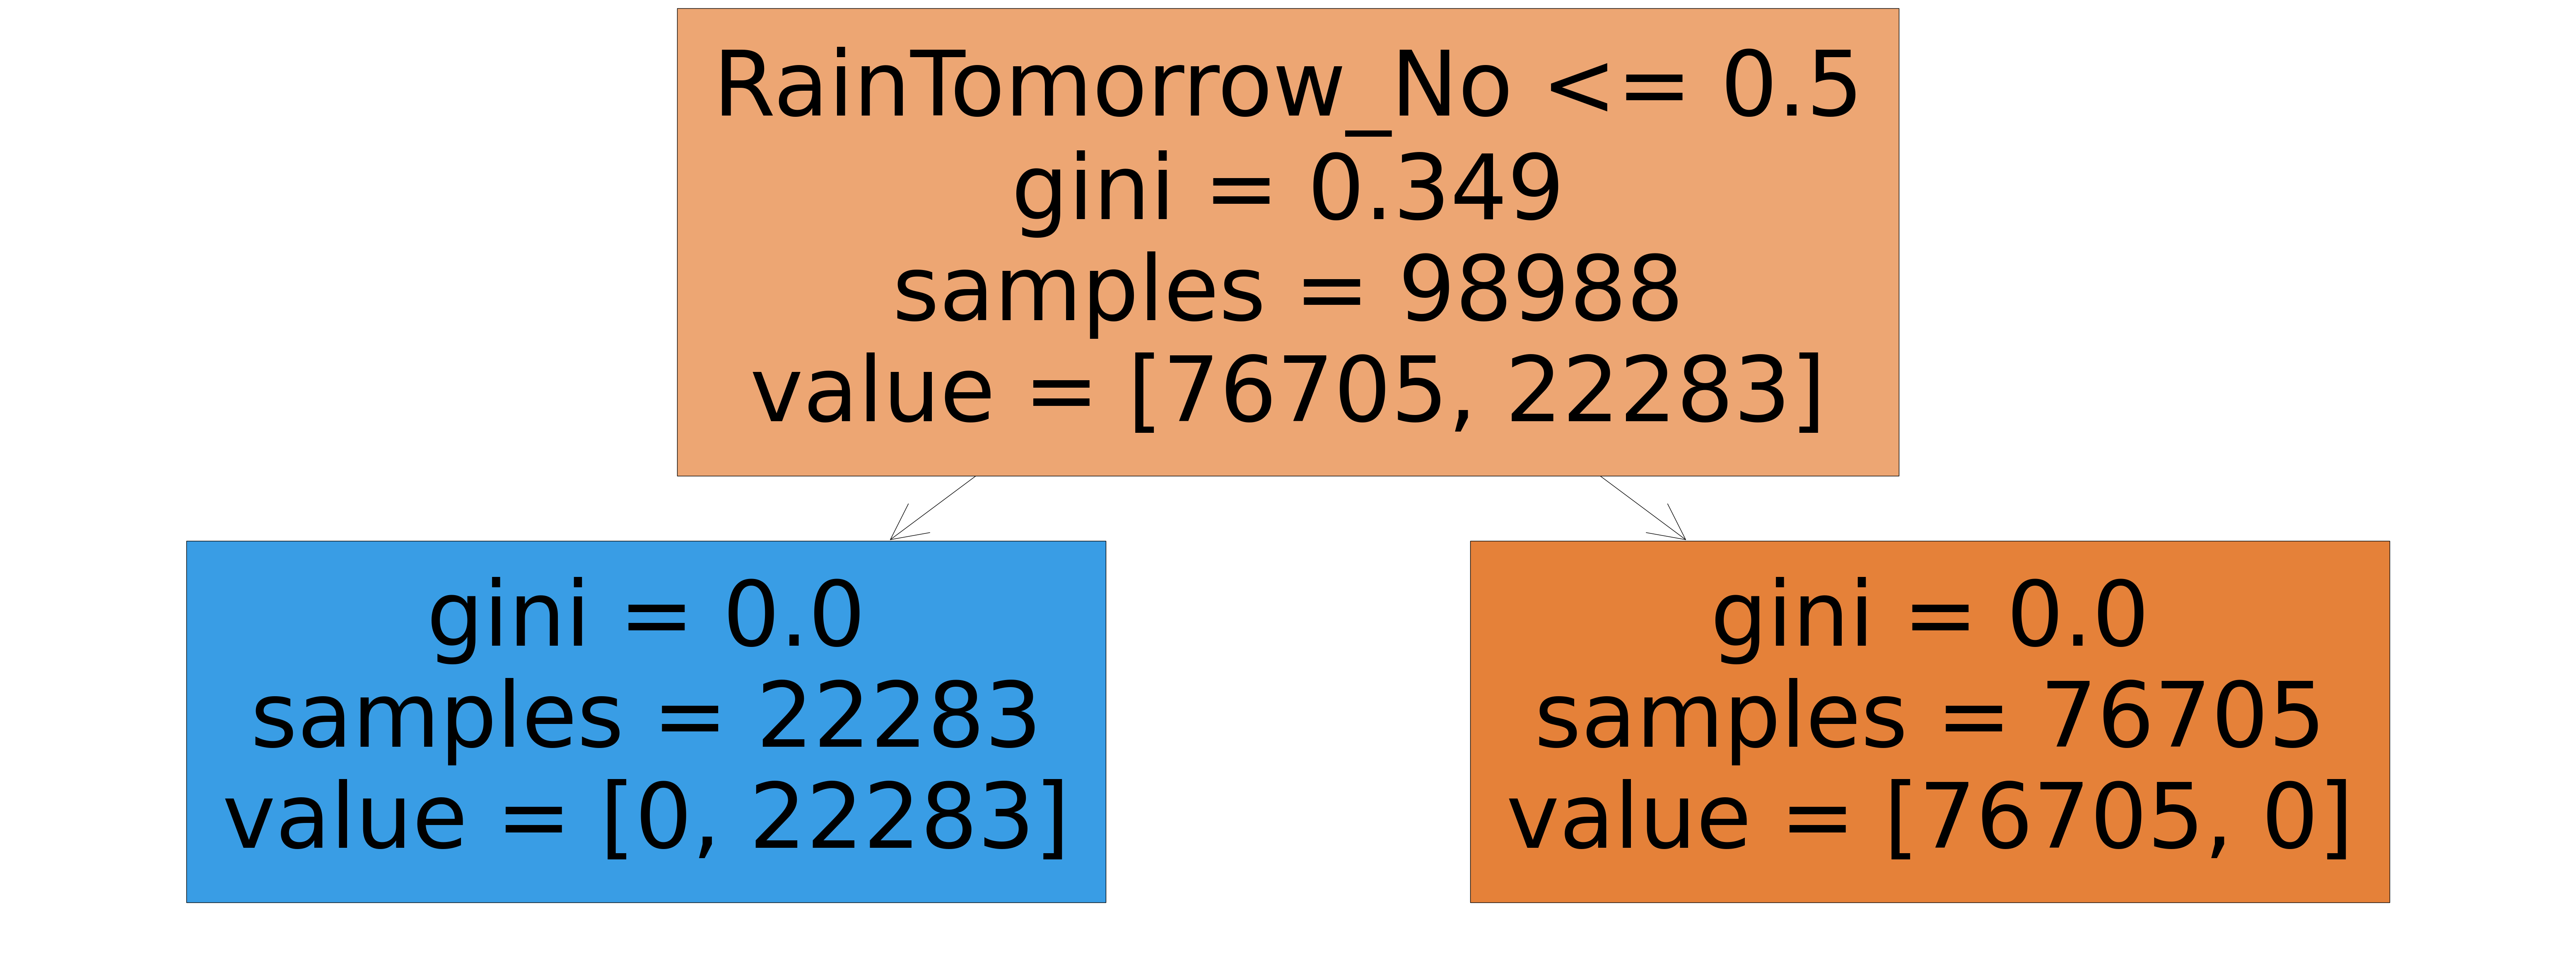

In [327]:
plt.figure(figsize=(80,30))
plot_tree(model,feature_names=x_train.columns, max_depth=1,filled=True);

Gini score less score is good split

In [328]:
# use to find the total depth of the tree
model.tree_.max_depth

1

In [329]:
tree_text=export_text(model,feature_names=list(x_train.columns))
print(tree_text)

|--- RainTomorrow_No <= 0.50
|   |--- class: Yes
|--- RainTomorrow_No >  0.50
|   |--- class: No



# Feature importances

In [330]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0.])

In [341]:
importance_df=pd.DataFrame({
    'feature':x_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [342]:
importance_df.head(20)

,feature,importance
119,RainTomorrow_No,1.0
1,MaxTemp,0.0
2,Rainfall,0.0
3,Evaporation,0.0
4,Sunshine,0.0
5,WindGustSpeed,0.0
6,WindSpeed9am,0.0
7,WindSpeed3pm,0.0
8,Humidity9am,0.0
9,Humidity3pm,0.0


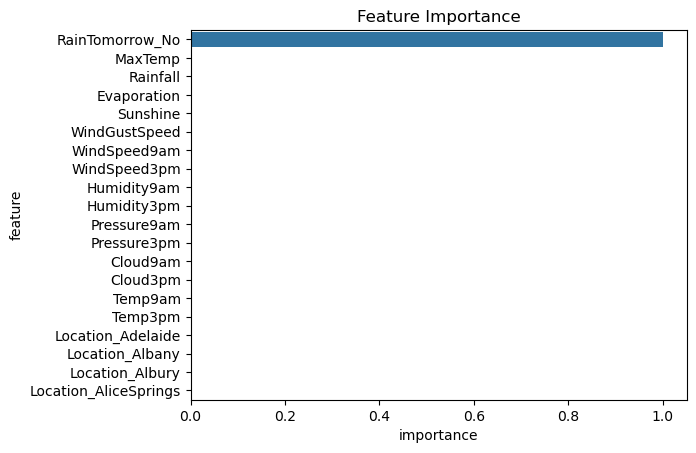

In [344]:
plt.title('Feature Importance')
sns.barplot(x='importance',y='feature',data=importance_df.head(20))
plt.show()

# Hyperparameter Tuning and Overfitting

In [345]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

.

🌲 Key Hyperparameters in Decision Trees (using sklearn.tree.DecisionTreeClassifier)   
Hyperparameter	Description   
max_depth	Maximum depth of the tree (limits how deep it can go). Prevents overfitting.   
min_samples_split	Minimum number of samples required to split an internal node.   
min_samples_leaf	Minimum number of samples a leaf node must have.    
max_features	Maximum number of features to consider when splitting a node.    
criterion	Function to measure the quality of a split: "gini" or "entropy".    
splitter	Strategy used to choose the split: "best" or "random".    
max_leaf_nodes	Maximum number of leaf nodes.    
class_weight	Weights associated with classes to handle class imbalance.     
